# 🏡 Airbnb Price Prediction Using Machine Learning

This project explores how to predict Airbnb listing prices using features such as location, room type, availability, and host details.

We use a Random Forest Regressor with log-transformed price values to improve model performance, and evaluate results both in log space and actual dollar amounts.(This is done towards the end.)


In [271]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [228]:
#loading the toronto listing dataset
df = pd.read_csv('datasets/listings.csv.gz', compression='gzip')
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (21660, 79)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,696407278180533419,https://www.airbnb.com/rooms/696407278180533419,20250302144713,2025-03-03,city scrape,Lovely Location,You'll have a great time at this comfortable p...,The area includes:<br />Restaurants<br />- Cas...,https://a0.muscache.com/pictures/2de3b6fe-eeeb...,134799582,...,5.0,5.00,4.9,STR-2206-FXYKVD,f,3,3,0,0,0.33
1,696457318817239920,https://www.airbnb.com/rooms/696457318817239920,20250302144713,2025-03-03,city scrape,31-201 simple living space with private washroom,"Located in the city and China town center,1 mi...","Chinatown, Kensington market, uOFT",https://a0.muscache.com/pictures/hosting/Hosti...,471873988,...,5.0,5.00,5.0,NaN,t,8,0,8,0,0.37
2,696460661218975906,https://www.airbnb.com/rooms/696460661218975906,20250302144713,2025-03-03,city scrape,Basement Modern living space with private wash...,It’s basement room with private washroom.Locat...,NaN,https://a0.muscache.com/pictures/cb2c1913-3877...,471873988,...,NaN,NaN,NaN,NaN,t,8,0,8,0,NaN
3,696464107547351397,https://www.airbnb.com/rooms/696464107547351397,20250302144713,2025-03-03,previous scrape,Basement clean room in Kensington Market,"Located in the city and China town center,1 mi...",NaN,https://a0.muscache.com/pictures/fcc2dd2e-4d4b...,471873988,...,5.0,4.50,5.0,NaN,t,8,0,8,0,0.60
4,696602542310304703,https://www.airbnb.com/rooms/696602542310304703,20250302144713,2025-03-03,city scrape,Downtown Private 1 Bedroom Apartment with Patio,Downtown Toronto in the heart of Queen St betw...,"Explore all the City has to offer on foot, bic...",https://a0.muscache.com/pictures/airflow/Hosti...,1498613,...,5.0,4.91,5.0,NaN,f,1,1,0,0,0.39


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21660 entries, 0 to 21659
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            21660 non-null  int64  
 1   listing_url                                   21660 non-null  object 
 2   scrape_id                                     21660 non-null  int64  
 3   last_scraped                                  21660 non-null  object 
 4   source                                        21660 non-null  object 
 5   name                                          21660 non-null  object 
 6   description                                   21228 non-null  object 
 7   neighborhood_overview                         10010 non-null  object 
 8   picture_url                                   21660 non-null  object 
 9   host_id                                       21660 non-null 

In [230]:
df.describe()


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.166000e+04,2.166000e+04,2.166000e+04,21641.000000,21641.000000,0.0,21660.000000,21660.000000,21660.000000,15863.000000,...,16442.000000,16442.000000,16442.000000,16441.000000,16442.000000,21660.000000,21660.000000,21660.000000,21660.000000,16444.000000
mean,6.162714e+17,2.025030e+13,2.315979e+08,6.661199,10.489164,NaN,43.684451,-79.397439,3.183703,1.289227,...,4.746162,4.856000,4.872512,4.840182,4.706124,4.890951,2.534995,2.350970,0.004986,1.283649
std,5.341126e+17,0.000000e+00,2.117178e+08,17.274197,29.935917,NaN,0.050091,0.071721,2.011166,0.618227,...,0.413312,0.321657,0.322582,0.285564,0.406720,11.643615,7.780640,8.621352,0.095482,1.664607
min,1.419000e+03,2.025030e+13,1.565000e+03,1.000000,1.000000,NaN,43.585750,-79.623950,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.384958e+07,2.025030e+13,3.752000e+07,1.000000,1.000000,NaN,43.646387,-79.430200,2.000000,1.000000,...,4.670000,4.840000,4.880000,4.800000,4.630000,1.000000,0.000000,0.000000,0.000000,0.180000
50%,7.727004e+17,2.025030e+13,1.547362e+08,2.000000,3.000000,NaN,43.665365,-79.397431,2.000000,1.000000,...,4.880000,4.960000,4.980000,4.930000,4.800000,1.000000,1.000000,0.000000,0.000000,0.580000
75%,1.123401e+18,2.025030e+13,4.445227e+08,4.000000,6.000000,NaN,43.711504,-79.372980,4.000000,1.500000,...,5.000000,5.000000,5.000000,5.000000,4.940000,3.000000,1.000000,2.000000,0.000000,1.850000
max,1.367403e+18,2.025030e+13,6.816306e+08,283.000000,583.000000,NaN,43.837740,-79.126170,16.000000,20.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,95.000000,99.000000,3.000000,29.040000


In [231]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               5216
Length: 79, dtype: int64

In [232]:
df.columns.tolist()


['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [233]:
df['price'].head()


0    $450.00
1     $78.00
2     $78.00
3        NaN
4    $132.00
Name: price, dtype: object

In [234]:
# Remove $ sign and commas for calculations in price
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/g5/567rywyn64vf4gm2933d24zh0000gn/T/ipykernel_3843/152890053.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [235]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [236]:
#done to check if data conversions are successfully made
print(df['price'].dtype)
print(df['last_review'].dtype)


float64
datetime64[ns]


In [237]:
#1. Total number of listings
print("Total number of listings:", df.shape[0])


Total number of listings: 21660


In [238]:
#2.Total number of unique hosts
print("Total number of unique hosts:", df['host_id'].nunique())


Total number of unique hosts: 14483


In [239]:
# 3. Top 10 neighborhoods with most listings
top_neigh = df['neighbourhood_cleansed'].value_counts().head(10).reset_index()

# Presenting the data
top_neigh.columns = ['Neighbourhood', 'Number of Listings']
top_neigh.index = top_neigh.index + 1
top_neigh


,Neighbourhood,Number of Listings
1,Waterfront Communities-The Island,3564
2,Niagara,890
3,Annex,673
4,Church-Yonge Corridor,639
5,Trinity-Bellwoods,543
6,Kensington-Chinatown,528
7,Dovercourt-Wallace Emerson-Junction,526
8,Bay Street Corridor,517
9,Moss Park,510
10,Willowdale East,440


## 🧮 Step 2: Feature Selection

We select relevant numerical and categorical features such as:

- Room type
- Minimum nights
- Reviews
- Host activity

Categorical variables are one-hot encoded.


In [240]:
# 4. Room type distribution
room_type_counts = df['room_type'].value_counts().reset_index()

# Presenting the data
room_type_counts.columns = ['Room Type', 'Number of Listings']
room_type_counts.index = room_type_counts.index + 1
room_type_counts


,Room Type,Number of Listings
1,Entire home/apt,14274
2,Private room,7336
3,Shared room,50


In [241]:
# 5. Average price of all listings
average_price = round(df['price'].mean(), 2)
print(f"Average price of listings: ${average_price}")


Average price of listings: $171.99


In [242]:
# 6. Statistics regarding minimum nights stay
minimum_nights_stats = df['minimum_nights'].describe()

# Presenting the data
minimum_nights_df = pd.DataFrame(minimum_nights_stats).reset_index()
minimum_nights_df.columns = ['Statistic', 'Value ($)']
minimum_nights_df.index = minimum_nights_df.index + 1
minimum_nights_df

,Statistic,Value ($)
1,count,21660.000000
2,mean,24.686796
3,std,40.163769
4,min,1.000000
5,25%,2.000000
6,50%,28.000000
7,75%,28.000000
8,max,1125.000000


In [243]:
# 7. Statistics for availability across the year
availability_stats = df['availability_365'].describe()

# Presenting the data
availability_df = pd.DataFrame(availability_stats).reset_index()
availability_df.columns = ['Statistic', 'Value($)']
availability_df.index = availability_df.index + 1
availability_df



,Statistic,Value($)
1,count,21660.000000
2,mean,159.825854
3,std,132.410947
4,min,0.000000
5,25%,29.000000
6,50%,147.500000
7,75%,275.000000
8,max,365.000000


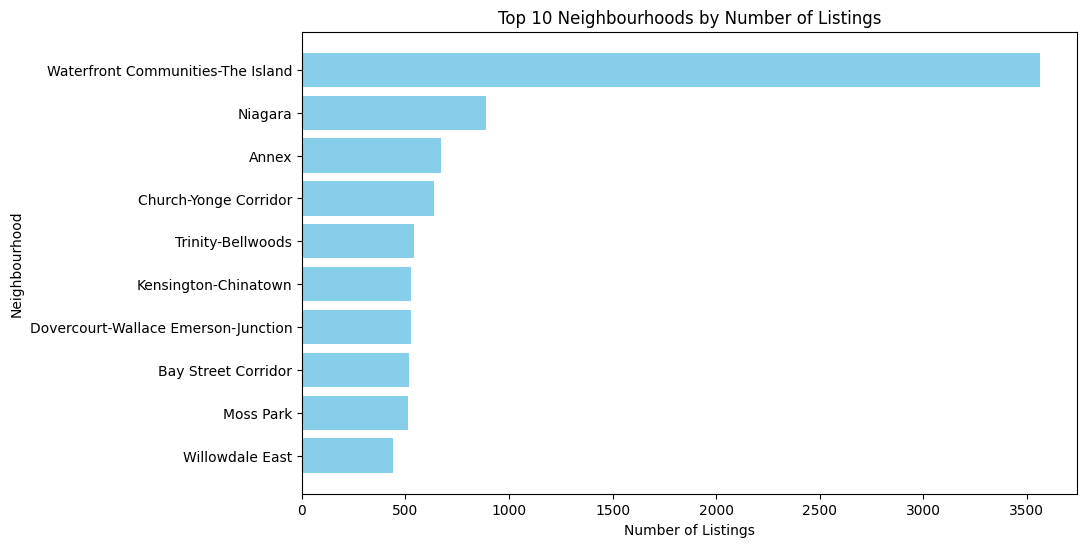

In [244]:
# Bar chart for Top 10 Neighbourhoods
plt.figure(figsize=(10,6))
plt.barh(top_neigh['Neighbourhood'], top_neigh['Number of Listings'], color='skyblue')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Neighbourhoods by Number of Listings')
plt.gca().invert_yaxis() 
plt.show()


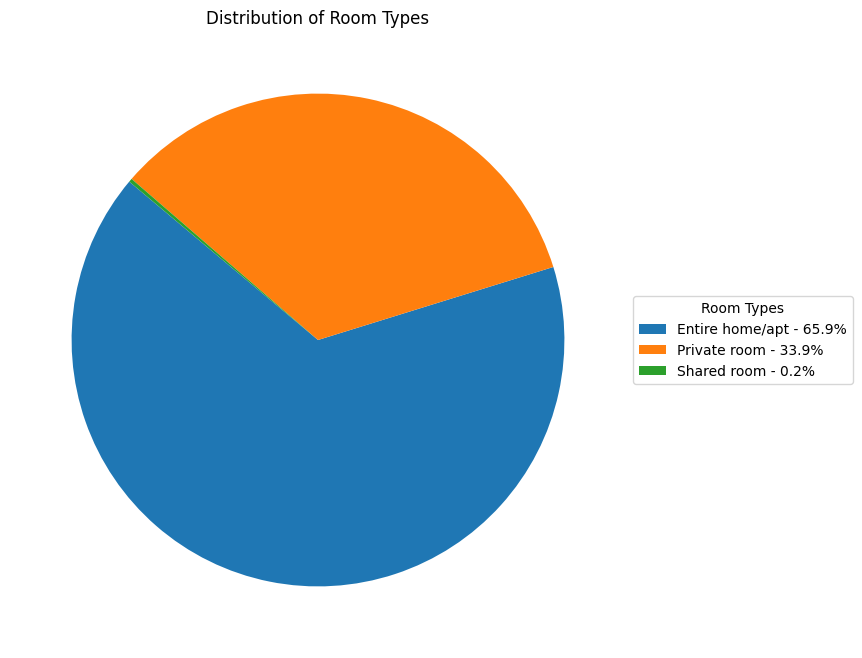

In [245]:
# Calculate room type distribution
room_type_counts['Percentage'] = (room_type_counts['Number of Listings'] / room_type_counts['Number of Listings'].sum()) * 100

# Plot
plt.figure(figsize=(8,8))
wedges, texts = plt.pie(room_type_counts['Number of Listings'], startangle=140)

# Create custom legend labels with Room Type and Percentage
legend_labels = [f"{room_type} - {percentage:.1f}%" 
                 for room_type, percentage in zip(room_type_counts['Room Type'], room_type_counts['Percentage'])]

# Add legend
plt.legend(wedges, legend_labels, title="Room Types", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Room Types')
plt.show()


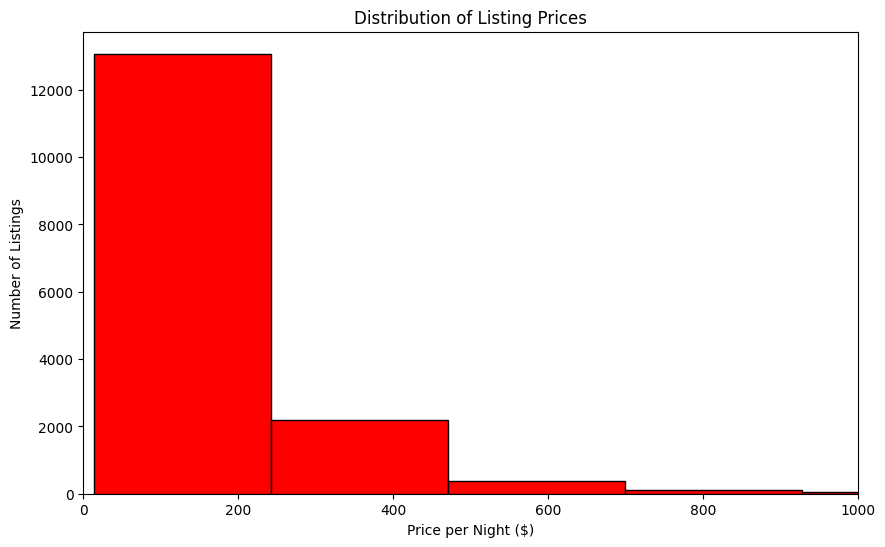

In [246]:
# Histogram of prices
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=50, color='red', edgecolor='black')
plt.xlabel('Price per Night ($)')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listing Prices')

plt.xlim(0, 1000)  
plt.show()


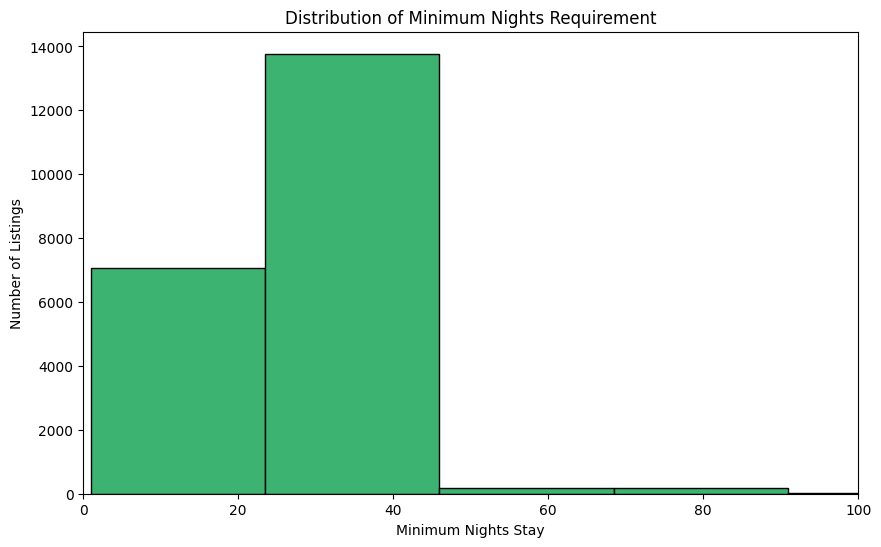

In [247]:
# Histogram of minimum nights
plt.figure(figsize=(10,6))
plt.hist(df['minimum_nights'], bins=50, color='mediumseagreen', edgecolor='black')
plt.xlabel('Minimum Nights Stay')
plt.ylabel('Number of Listings')
plt.title('Distribution of Minimum Nights Requirement')

plt.xlim(0, 100)  
plt.show()


In [248]:
# 9.1: Average price by room type
room_type_price=df.groupby('room_type')['price'].mean().reset_index()

room_type_price.columns=['Room Type' , 'Average Price ($)']
room_type_price=room_type_price.sort_values(by='Average Price ($)', ascending=False)
room_type_price.index= room_type_price.index + 1
room_type_price

,Room Type,Average Price ($)
1,Entire home/apt,216.854584
2,Private room,85.747548
3,Shared room,83.000000


In [249]:
#9.2 Host listings
host_listings=df.groupby('host_id').size().reset_index(name='Number of Listings')
host_listings=host_listings.sort_values(by='Number of Listings', ascending=False)
host_listings.head(10)

,host_id,Number of Listings
8435,206663714,100
11589,492072839,95
7909,174661737,54
6450,105605194,54
10313,382883363,52
8994,245417090,48
11968,508046575,40
197,846505,40
4838,54422135,39
7366,146226441,39


In [267]:

# Removing extreme outliers for training the model
# (This is only done here and not earlier as the earlier EDA analysis needs to show the entire dataset.
# Here, to improve the accuracy of the model, this is done.)
df_clean = df[df['price'] <= 1000]


model_data = df_clean[['price', 'room_type', 'minimum_nights', 'number_of_reviews',
                       'reviews_per_month', 'availability_365', 'calculated_host_listings_count',
                       'latitude', 'longitude', 'bedrooms', 'beds', 'bathrooms']]

# Dropping the missing values
model_data = model_data.dropna()

# One-hot encode categorical feature
model_data_encoded = pd.get_dummies(model_data, columns=['room_type'], drop_first=True)

#Log-transform the target variable(READ BELOW)
model_data_encoded['log_price'] = np.log1p(model_data_encoded['price'])
model_data_encoded = model_data_encoded.drop('price', axis=1)

X = model_data_encoded.drop('log_price', axis=1)
y = model_data_encoded['log_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evaluating the model (on log scale)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_log = mean_absolute_error(y_test, y_pred)
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
r2_log = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (log): {mae_log:.4f}")
print(f"Root Mean Squared Error (log): {rmse_log:.4f}")
print(f"R² Score (log): {r2_log:.4f}")

# Converting the log predictions back to dollar values
predicted_prices = np.expm1(y_pred)
actual_prices = np.expm1(y_test)

mae_dollars = mean_absolute_error(actual_prices, predicted_prices)
rmse_dollars = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
r2_dollars = r2_score(actual_prices, predicted_prices)

print(f"\nMean Absolute Error ($): ${mae_dollars:.2f}")
print(f"Root Mean Squared Error ($): ${rmse_dollars:.2f}")
print(f"R² Score ($): {r2_dollars:.4f}")


Mean Absolute Error (log): 0.2909
Root Mean Squared Error (log): 0.3932
R² Score (log): 0.6647

Mean Absolute Error ($): $49.91
Root Mean Squared Error ($): $88.73
R² Score ($): 0.5104


## 🔍 Why Use Log Transformation on Price above?

Airbnb prices tend to be highly skewed, with a long tail of expensive listings that can distort model training.  
To stabilize the overall variance and to reduce the impact of extreme outliers, we apply a **log transformation** to the target variable (`price`) which helps with the following:
- Normalize the price distribution
- Improve model performance and R²
- Ensure better error handling across both cheap and luxury listings

After prediction, the log transformation is reversed using `np.expm1()` to get the final price in dollars.


## Conclusion

This project demonstrates an end-to-end approach to predicting Airbnb listing prices using machine learning.

By applying data cleaning, feature engineering, and a log transformation to address price skewness, we trained a Random Forest model that achieved strong performance:
- Mean Absolute Error (MAE): ~$50
- R² Score: ~0.51 (in dollars)

The model provides reliable estimates of Airbnb prices using core features such as room type, availability, reviews, and location. It serves as a solid foundation for further development, including the addition of new features (e.g., amenities, host traits) and the use of more advanced models like Gradient Boosting.



## 🔧 Future Work and Improvements

This project is still being improved. Here are a few things that are planned or in progress:

### 1. Better Feature Cleaning (Coming Soon)
- Add a proper data cleaning function
- Include features like:
  - `bathrooms` (from `bathrooms_text`)
  - `amenities` (e.g., Wi-Fi, kitchen, parking)
  - `host_is_superhost`, `instant_bookable`

These extra details can help improve the model’s accuracy.

### 2. Predict Price from User Input
- A function will be added to input listing details and get a predicted price
- There will also be a front-end built for this (e.g., using Streamlit)